# Assignment -2 Red White Wine Classification by Naive Bayes Classifier
## Author - Anjali Aggarwal


To reproduce the results please check this link https://notebooks.azure.com/AnjaliAggarwal/libraries/UWDataScienceAssignments

In [41]:
# imported python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [42]:
# load the csv data file to panda dataframe
df = pd.read_csv("RedWhiteWine.csv", sep=",")

In [43]:
#first five rows of the data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
Class                   6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


There is no missing value in the data set. All the features has  continuous values except "Class" and "quality".  Target label 'Class' has binary values. 0 denotes for white wine and red denotes as red wine. "quality" features has ordinal values. Removing this feature form the data set.

In [45]:
df = df.drop(columns = ['quality'])

In [46]:
df.columns # checking if "quality feature has been removed from the data set"

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Class'],
      dtype='object')

In [47]:
df.loc[:, 'Class'].value_counts()# checking the value counts for white and red wine in the dataset

0    4898
1    1599
Name: Class, dtype: int64

# Exploratory data analysis

In [48]:
df.describe()# basic statistical report

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


Mean and median are different for the most of the features except fixed acidity, citric acid, density, ph. Interquantile range is not consistant that shows data is not normally distributed and having outliners

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf653d9a58>,
      dtype=object)

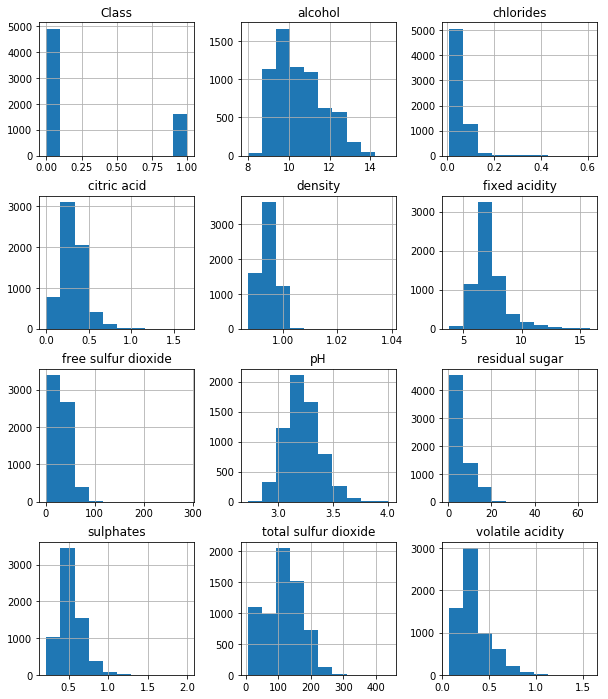

In [49]:
# distribution of data by histogram
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 12
df.hist()

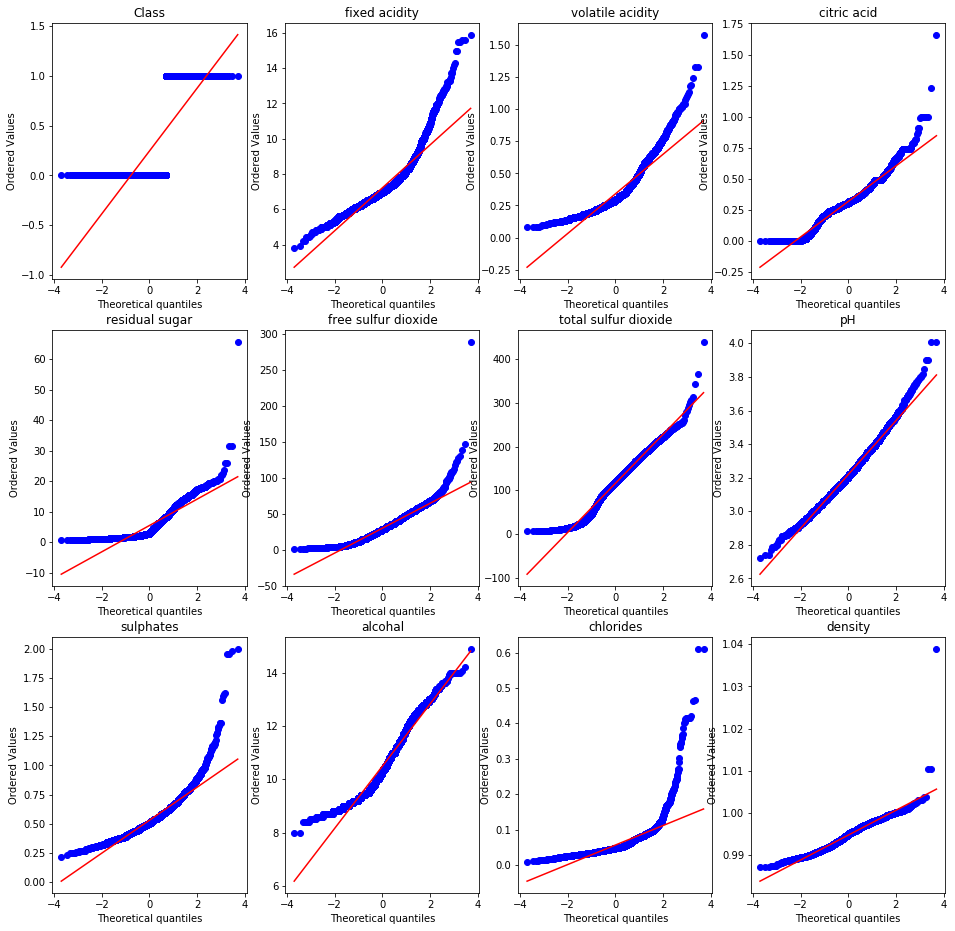

In [50]:
# checking normal distibution by qqplot
Class = df.loc[:, "Class"]
fixed_acidity = df.loc[:, "fixed acidity"]
volatile_acidity = df.loc[:, 'volatile acidity']
citric_acid = df.loc[:, 'citric acid']
residual_sugar = df.loc[:, 'residual sugar']
free_sulfur_dioxide = df.loc[:, 'free sulfur dioxide']
total_sulfur_dioxide = df.loc[:, 'total sulfur dioxide']
pH = df.loc[:, 'pH']
sulphates = df.loc[:, 'sulphates']
alcohol = df.loc[:, 'alcohol']
chlorides = df.loc[:, 'chlorides']
density = df.loc[:, 'density']

def qq_plot(vec1, vec2, vec3, vec4, vec5, vec6, vec7, vec8, vec9, vec10, vec11, vec12):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    plt.figure(figsize=(16, 16)).gca() # define axis
    ax1 = plt.subplot(3,4,1) 
    ss.probplot(vec1, plot = ax1) 
    plt.title('Class')
    ax1 = plt.subplot(3,4,2) 
    ss.probplot(vec2, plot = ax1) 
    plt.title('fixed acidity')
    ax1 = plt.subplot(3,4,3) 
    ss.probplot(vec3, plot = ax1) 
    plt.title('volatile acidity')
    ax1 = plt.subplot(3,4,4) 
    ss.probplot(vec4, plot = ax1) 
    plt.title('citric acid')
    ax1 = plt.subplot(3,4,5) 
    ss.probplot(vec5, plot = ax1) 
    plt.title('residual sugar')
    ax1 = plt.subplot(3,4,6) 
    ss.probplot(vec6, plot = ax1) 
    plt.title('free sulfur dioxide')
    ax1 = plt.subplot(3,4,7) 
    ss.probplot(vec7, plot = ax1) 
    plt.title('total sulfur dioxide')
    ax1 = plt.subplot(3,4,8) 
    ss.probplot(vec8, plot = ax1) 
    plt.title('pH')
    ax1 = plt.subplot(3,4,9) 
    ss.probplot(vec9, plot = ax1)
    plt.title('sulphates')
    ax1 = plt.subplot(3,4,10) 
    ss.probplot(vec10, plot = ax1) 
    plt.title('alcohal')
    ax1 = plt.subplot(3,4,11) 
    ss.probplot(vec11, plot = ax1) 
    plt.title('chlorides')
    ax1 = plt.subplot(3,4,12) 
    ss.probplot(vec12, plot = ax1)
    plt.title('density')

qq_plot(Class, fixed_acidity, volatile_acidity, citric_acid, residual_sugar, free_sulfur_dioxide, total_sulfur_dioxide, pH, sulphates, alcohol, chlorides, density) 

In [51]:
# normalization of data to visualize features on the same plot
# z scaling function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std


features = df.iloc[:, 0:11]
features_scale = scale(features)


# Data visualization 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

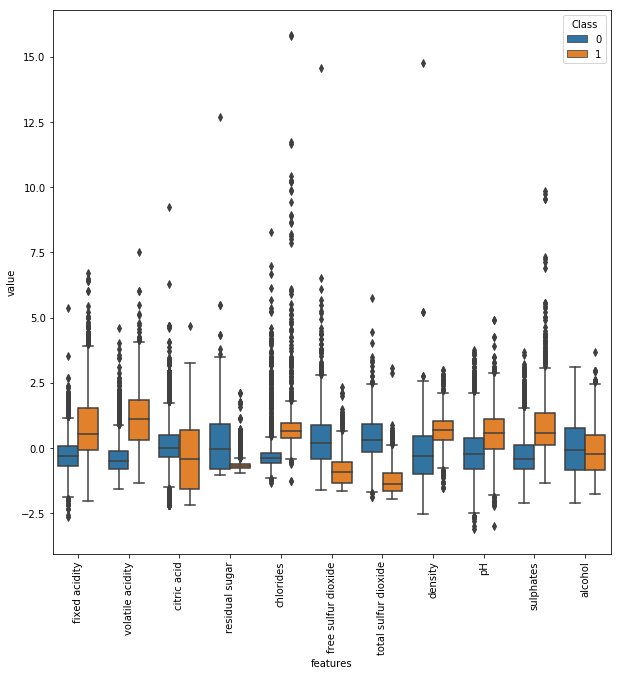

In [52]:
# Box plot to check the distribution of features with respect to target label "Class"
y = df.loc[:, 'Class']
data = pd.concat([y,features_scale],axis=1)
#melt is for groupby features  with class
data = pd.melt(data,id_vars="Class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Class", data=data)
plt.xticks(rotation=90)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[in

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

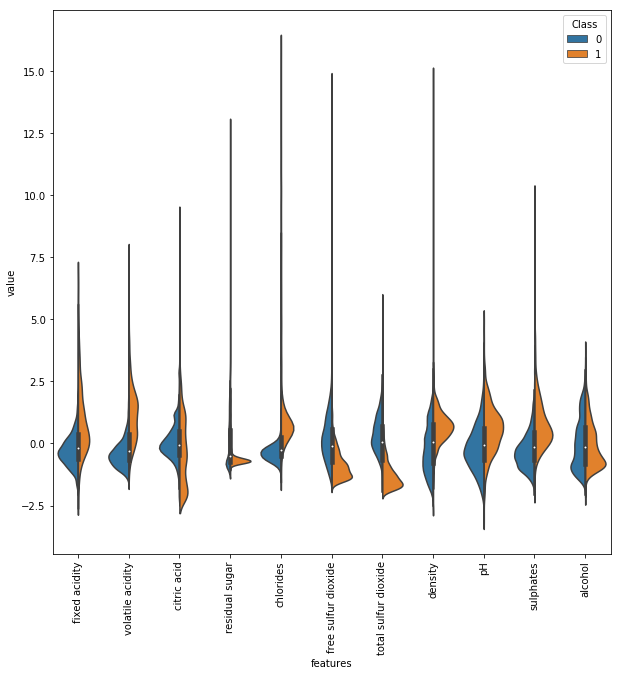

In [53]:
# violin plots to check the distribution of the data with respect of target label "class"
y = df.loc[:, 'Class']
data = pd.concat([y,features_scale],axis=1)
#melt is for groupby features  with Diagnosis
data = pd.melt(data,id_vars="Class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Class", data=data,split=True )
plt.xticks(rotation=90)

In [54]:
#Checking correlation between the features by correlaetion matrix
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Class
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.487218


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

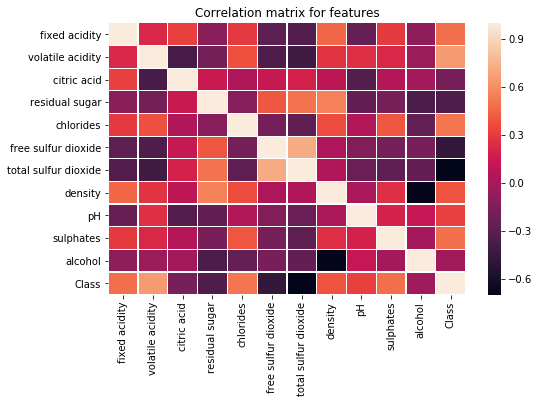

In [55]:
# heatmap to check feature correlation
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df_corr, linewidths=.25, ax=ax)
plt.title('Correlation matrix for features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

target lable - "Class" has no relation with "free sulfur dioxide" and total sulfur dioxide", therfore these features can be removed. There is no other features those are showing highly co-related with each other

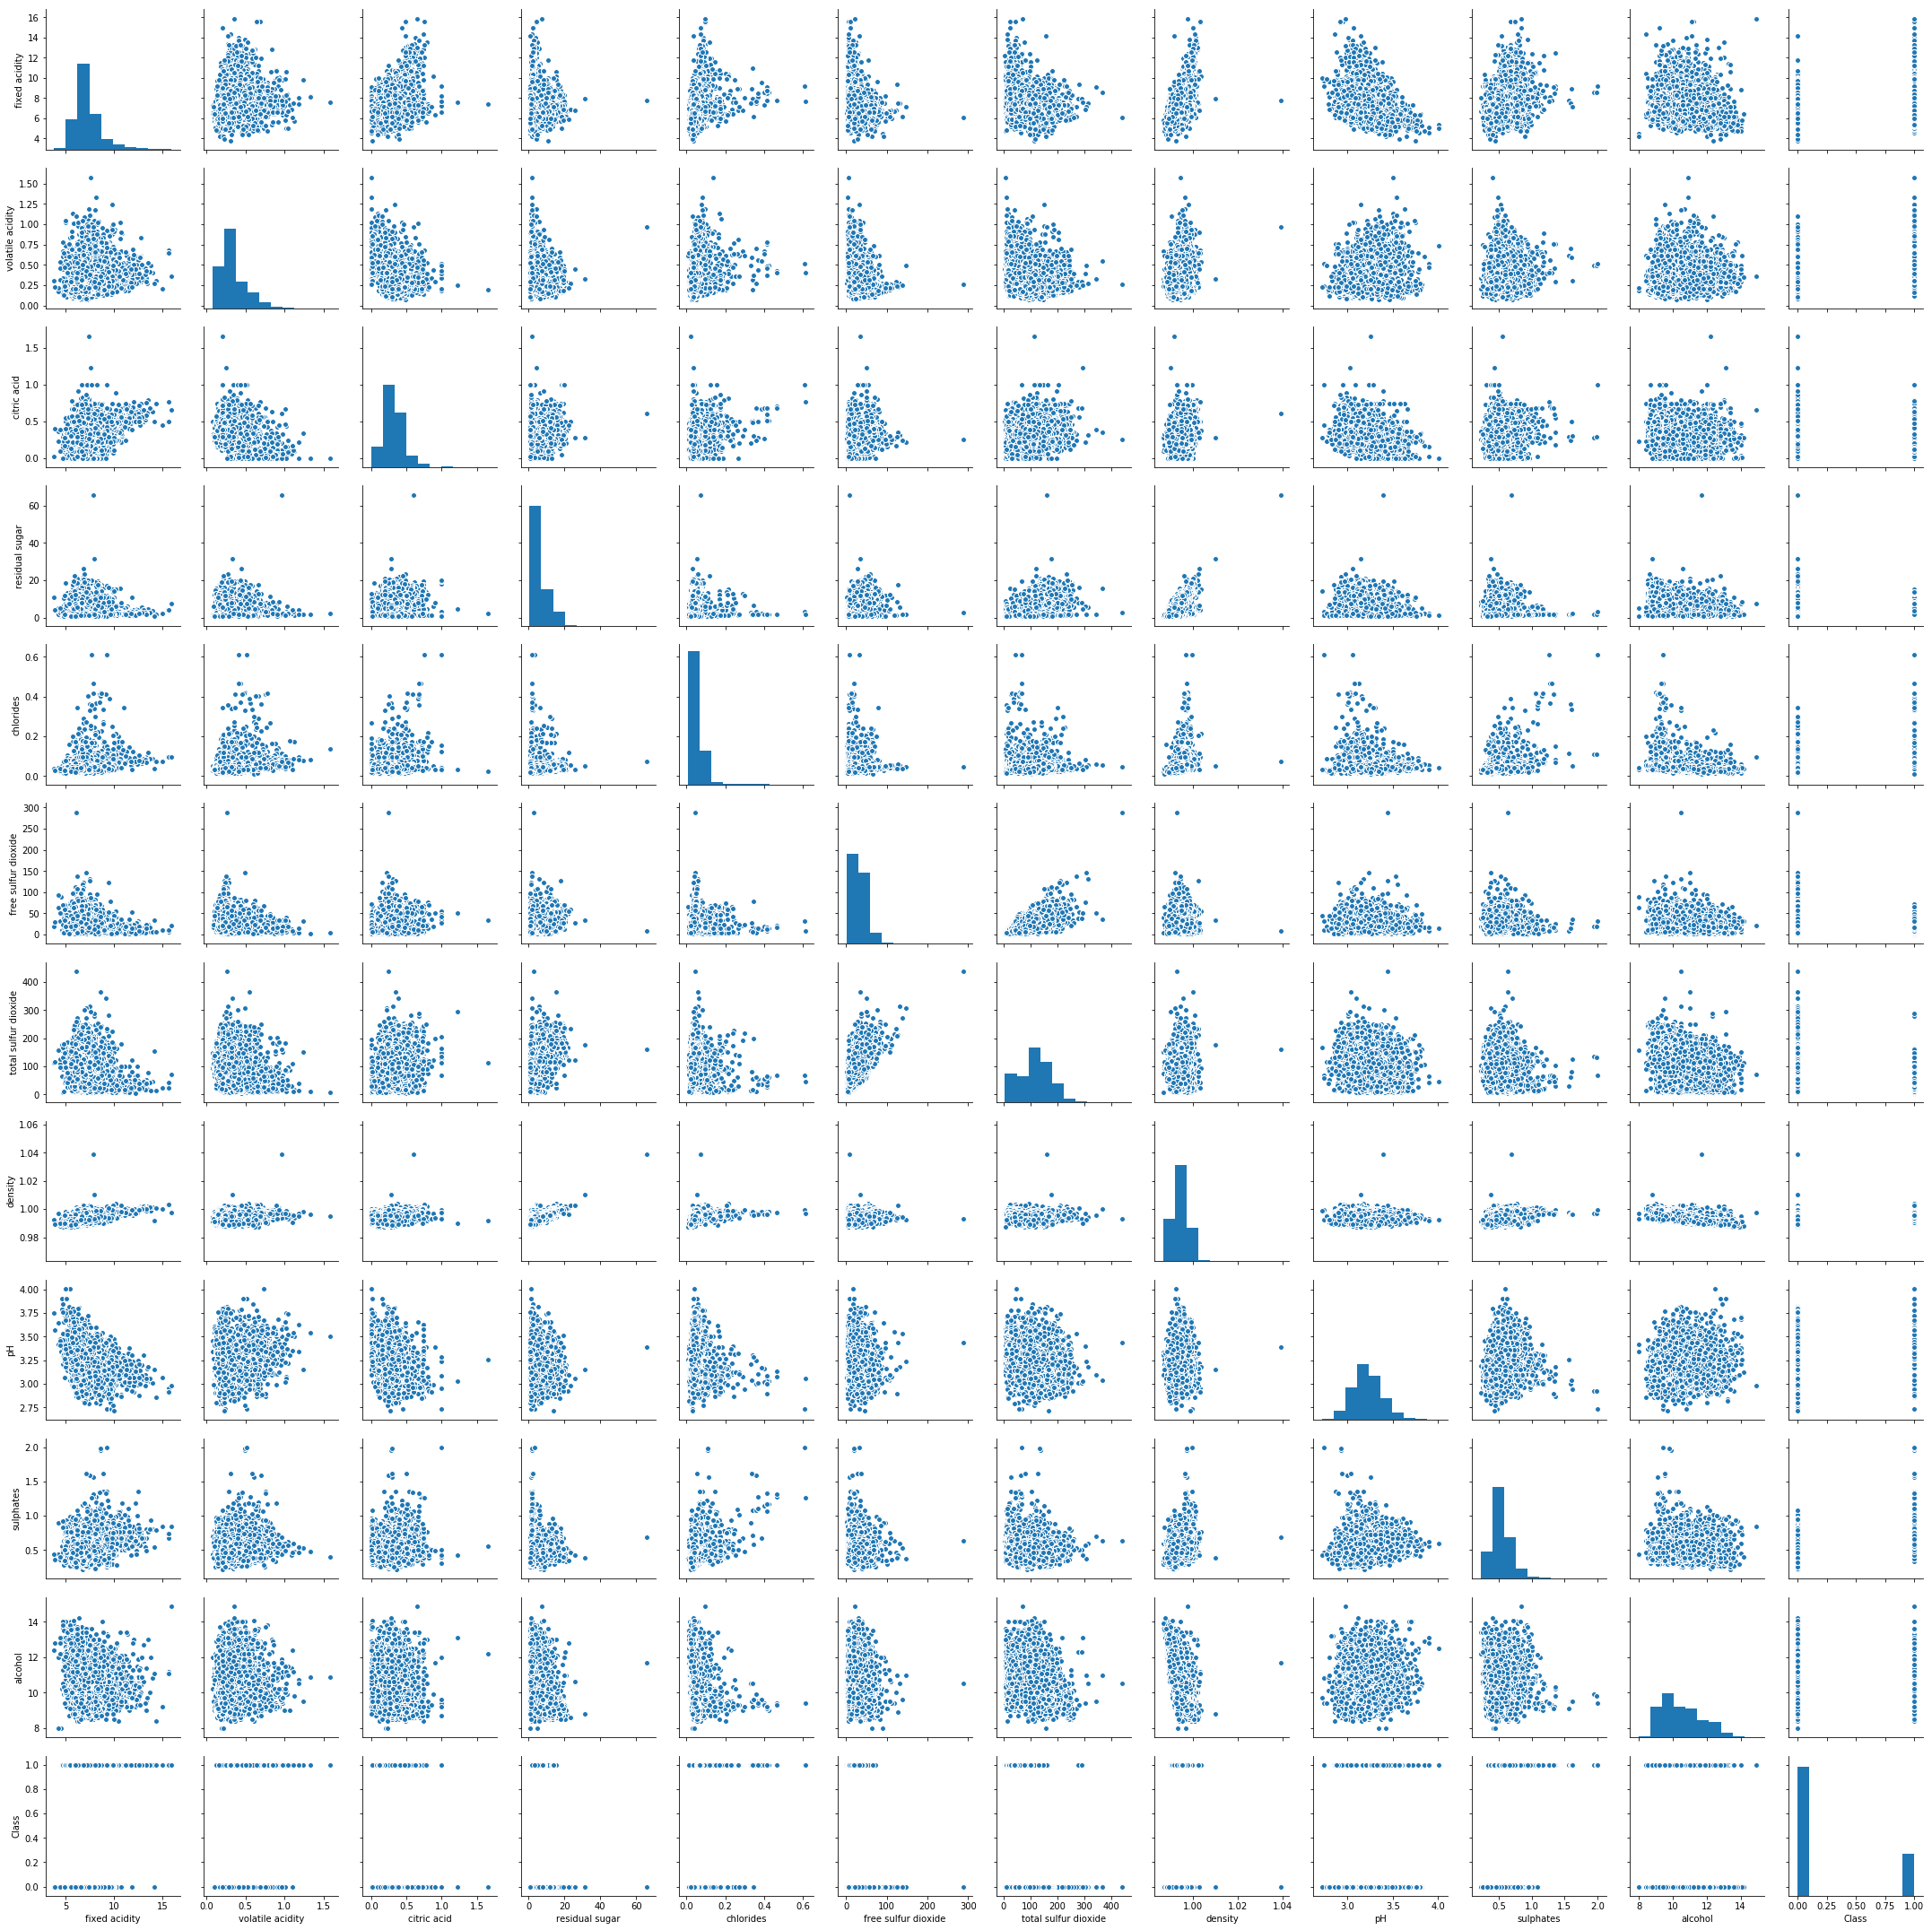

In [56]:
#also checking relation between features by pair plotting
sns.pairplot(df)

These pair plot doesn't show relation with each other.

# Naive Bayes Classifier

In [57]:
#scaling all the features in the data frame
num_features = ['fixed acidity', 'volatile acidity','citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density', 'pH', 'sulphates', 'alcohol']
scaled_features = {}
for each in num_features:
    mean, std = df[each].mean(), df[each].std()
    scaled_features[each] = [mean, std]
    df.loc[:, each] = (df[each] - mean)/std

In [ ]:
#data is splitting between training and testing (80% training and 20% testing)
msk = np.random.rand(df.shape[0]) <= 0.8
df_train = df.iloc[msk, 0:11]
df_train_target = df.iloc[msk, 11]
df_test = df.iloc[~msk, 0:11]
df_test_target = df.iloc[~msk, 11]

In [ ]:
from sklearn.naive_bayes import GaussianNB #import the gaussian naive bayes classifier for sklearn python library
gnb = GaussianNB()
gnb_model = gnb.fit(df_train, df_train_target)#applying NB classifier
y_pred = gnb_model.predict(df_test)
misclassified_points = (df_test_target != y_pred).sum()
print("Number of mislabeled points out of a total %d points : %d"\
      % (df_test.shape[0], misclassified_points))
print("Accuracy = %.2f"%(round((df_test.shape[0] - float(misclassified_points))/df_test.shape[0]*100,2)))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(df_test_target, gnb.predict(df_test) ))
print (classification_report(df_test_target, gnb.predict(df_test)))


- Model accuracy is 97.23%. Model  seems overfitted, removing some features. "free sulfur dioxide and total sulfur dioxide were showing no relation with target label. So, removing these features from the model

In [63]:
df = df.drop(columns = ["free sulfur dioxide", "total sulfur dioxide"])

In [64]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,Class
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,1.034913,1.812950,0.193082,-0.915394,1
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,0.701432,-0.115064,0.999502,-0.580023,1
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,0.768128,0.258100,0.797897,-0.580023,1
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,1.101609,-0.363840,0.327485,-0.580023,1
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,1.034913,1.812950,0.193082,-0.915394,1


In [65]:
msk = np.random.rand(df.shape[0]) <= 0.8
df_train = df.iloc[msk, 0:9]
df_train_target = df.iloc[msk, 9]
df_test = df.iloc[~msk, 0:9]
df_test_target = df.iloc[~msk, 9]

gnb = GaussianNB()
gnb_model = gnb.fit(df_train, df_train_target)#applying NB classifier
y_pred = gnb_model.predict(df_test)
misclassified_points = (df_test_target != y_pred).sum()
print("Number of mislabeled points out of a total %d points : %d"\
      % (df_test.shape[0], misclassified_points))
print("Accuracy = %.2f"%(round((df_test.shape[0] - float(misclassified_points))/df_test.shape[0]*100,2)))


Number of mislabeled points out of a total 1382 points : 47
Accuracy = 96.60


Accuracy has been decresed from 97 to 96%. To select the relevant features "principal component analysis" can be done.